# Final Project
#### Ana Clemmer

For the following project, you will be working with a movie dataset. The dataset is [here](https://drive.google.com/file/d/1R53inu8Jcb9GGoyiuVnBMVnO7XvCaJAE/view?usp=drive_link). The dataset columns are as follows:

* Title: The movie's title
* Genre: The movie's genre
* Stars: The number of famous actors in the movie
* Runtime: The length of the movie's runtime
* Budget: How much was spent on filming the movie (in millions)
* Promo: How much money was spent promoting the movie (in millions)
* Season: The season in which the movie was released
* Rating: The movie's rating
* R1: Reviewer 1's review
* R1: Reviewer 2's review
* R1: Reviewer 3's review

And the target variable:

* Success: Whether the film was a success or a flop

Fill in the answers to questions in the text field, and show your code below.

# Data loading

Load the data

In [ ]:
import pandas as pd
df = pd.read_csv("CMSC320FinalProjectData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  540 non-null    int64  
 1   Title       540 non-null    object 
 2   Runtime     540 non-null    int64  
 3   Stars       540 non-null    int64  
 4   Year        540 non-null    int64  
 5   Budget      540 non-null    float64
 6   Promo       540 non-null    float64
 7   Season      540 non-null    object 
 8   Rating      540 non-null    object 
 9   Genre       540 non-null    object 
 10  R1          540 non-null    object 
 11  R2          540 non-null    object 
 12  R3          540 non-null    object 
 13  Success     540 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 55.5+ KB


# Data Cleaning

List the three biggest data errors below, with a summary of how you fixed them and why you choose that method:

1. I found 17 movies with a runtime of 0, so I replaced these values with the average of the nonzero runtimes. I could have dropped these rows since I don't know what their true runtimes are, but the rest of the columns were populated and I chose to use mean imputation. This type of imputation was appropriate because the runtime data is numeric and not skewed or tailed.
2. The values in the Budget column were not all in the millions format. To fix this, I replaced each value greater than or equal to 1 million with itself divided by 1 million. This allowed me to analyze the budget data within the same scale.
3. Two rows in the dataset had 100 as their value for 'Stars' which is assumed to be impossible. Excluding these outliers, the maximum for this column is 5, so I replaced the outlier values with 5. These typos would have made the data inaccurate, so it was an appropriate fix to replace them with the accurate maximum.

In [ ]:
# Checking for null entries to drop
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  540 non-null    int64  
 1   Title       540 non-null    object 
 2   Runtime     540 non-null    int64  
 3   Stars       540 non-null    int64  
 4   Year        540 non-null    int64  
 5   Budget      540 non-null    float64
 6   Promo       540 non-null    float64
 7   Season      540 non-null    object 
 8   Rating      540 non-null    object 
 9   Genre       540 non-null    object 
 10  R1          540 non-null    object 
 11  R2          540 non-null    object 
 12  R3          540 non-null    object 
 13  Success     540 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 55.5+ KB


In [ ]:
# Replacing runtime=0 values
avg = round(df['Runtime'].sum()/(540-17),0)
df['Runtime'] = df['Runtime'].replace(to_replace=0,value=avg)
df.head(12)

,Unnamed: 0,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success
0,0,"""Love in the Inbox""",126,1,2020,6.679387e+07,73.543754,Winter,PG,Romantic Comedy,"""An unconvincing portrayal of suspense that fa...","""An uninspired plotline that lacks coherence a...","""A visually captivating masterpiece that mesme...",False
1,1,"""Coffee Shop Serendipity""",131,0,2020,4.667863e+01,33.572003,Fall,PG,Romantic Comedy,"""A movie that feels disjointed and fails to co...","""An attempt at humor that lacks cleverness and...","""A timeless classic that continues to enchant ...",False
2,2,"""The Wedding Date Dilemma""",132,4,2000,3.639134e+01,54.561523,Summer,PG,Romantic Comedy,"""An underwhelming cinematic effort with unconv...","""An emotionally resonant movie that connects u...","""A cinematic triumph that surpasses boundaries...",False
3,3,"""Heartstrings and Highways""",132,1,2015,9.324732e+01,59.714535,Winter,PG13,Romantic Comedy,"""A film that fails to resonate due to its lack...","""A beautifully crafted narrative that unfolds ...","""An uninspired portrayal of drama that feels s...",False
4,4,"""Falling for Cupid""",119,1,2015,9.213021e+01,67.643810,Fall,PG13,Romantic Comedy,"""A movie that struggles to evoke any genuine e...","""A testament to the power of storytelling, lea...","""An uplifting film that leaves a profound impa...",False
5,5,"""Second Chance at First Sight""",135,2,2007,1.575258e+02,132.387045,Summer,PG,Romantic Comedy,"""An attempt at suspense that lacks the necessa...","""A compelling journey that engages both the mi...","""An underwhelming attempt at storytelling with...",False
6,6,"""Love in Transit""",118,3,2008,2.988385e+01,37.724360,Spring,PG,Romantic Comedy,"""An uninspired storyline that fails to leave a...","""A film that lacks a clear direction and purpo...","""A feel-good movie that blends humor and heart...",False
7,7,"""The Matchmaker's Mishap""",139,0,2002,5.992704e+01,44.224691,Winter,PG,Romantic Comedy,"""An attempt at humor that misses the mark and ...","""A lackluster narrative that fails to engage o...","""An unconvincing portrayal of emotion that fee...",False
8,8,"""Unexpectedly Yours""",128,3,2006,4.461016e+01,44.208545,Winter,PG,Romantic Comedy,"""An uninspired plotline that lacks innovation ...","""A celebration of creativity and storytelling ...","""A movie that struggles to maintain viewer int...",False
9,9,"""Chasing Rainbows for Love""",129,3,2017,9.464885e+07,52.093015,Fall,R,Romantic Comedy,"""An attempt at suspense that fails to create a...","""An underwhelming cinematic effort with forget...","""An uninspired attempt at storytelling with sh...",False


In [ ]:
#formatting Budget so all values are in millions
df['Budget'] = df['Budget'].apply(lambda x : x/1000000 if x>=1000000 else x)
df.head(10)

,Unnamed: 0,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success
0,0,"""Love in the Inbox""",126,1,2020,66.793869,73.543754,Winter,PG,Romantic Comedy,"""An unconvincing portrayal of suspense that fa...","""An uninspired plotline that lacks coherence a...","""A visually captivating masterpiece that mesme...",False
1,1,"""Coffee Shop Serendipity""",131,0,2020,46.678633,33.572003,Fall,PG,Romantic Comedy,"""A movie that feels disjointed and fails to co...","""An attempt at humor that lacks cleverness and...","""A timeless classic that continues to enchant ...",False
2,2,"""The Wedding Date Dilemma""",132,4,2000,36.391338,54.561523,Summer,PG,Romantic Comedy,"""An underwhelming cinematic effort with unconv...","""An emotionally resonant movie that connects u...","""A cinematic triumph that surpasses boundaries...",False
3,3,"""Heartstrings and Highways""",132,1,2015,93.247317,59.714535,Winter,PG13,Romantic Comedy,"""A film that fails to resonate due to its lack...","""A beautifully crafted narrative that unfolds ...","""An uninspired portrayal of drama that feels s...",False
4,4,"""Falling for Cupid""",119,1,2015,92.130207,67.643810,Fall,PG13,Romantic Comedy,"""A movie that struggles to evoke any genuine e...","""A testament to the power of storytelling, lea...","""An uplifting film that leaves a profound impa...",False
5,5,"""Second Chance at First Sight""",135,2,2007,157.525765,132.387045,Summer,PG,Romantic Comedy,"""An attempt at suspense that lacks the necessa...","""A compelling journey that engages both the mi...","""An underwhelming attempt at storytelling with...",False
6,6,"""Love in Transit""",118,3,2008,29.883854,37.724360,Spring,PG,Romantic Comedy,"""An uninspired storyline that fails to leave a...","""A film that lacks a clear direction and purpo...","""A feel-good movie that blends humor and heart...",False
7,7,"""The Matchmaker's Mishap""",139,0,2002,59.927043,44.224691,Winter,PG,Romantic Comedy,"""An attempt at humor that misses the mark and ...","""A lackluster narrative that fails to engage o...","""An unconvincing portrayal of emotion that fee...",False
8,8,"""Unexpectedly Yours""",128,3,2006,44.610160,44.208545,Winter,PG,Romantic Comedy,"""An uninspired plotline that lacks innovation ...","""A celebration of creativity and storytelling ...","""A movie that struggles to maintain viewer int...",False
9,9,"""Chasing Rainbows for Love""",129,3,2017,94.648847,52.093015,Fall,R,Romantic Comedy,"""An attempt at suspense that fails to create a...","""An underwhelming cinematic effort with forget...","""An uninspired attempt at storytelling with sh...",False


In [ ]:
# replacing Stars values greater than the observed maximum
df['Stars'] = df['Stars'].apply(lambda x : 5 if x>5 else x)

# Data Exploration





Does Season have a stastically significant impact on a movie's success?

**p-value:** 0.005543826325489959 < 0.05 so yes

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Season'], df['Success'])
print(contingency_table)
chi2_contingency(contingency_table)

Success  False  True 
Season               
Fall        90     23
Spring      88     10
Summer     149     58
Winter      95     27


Chi2ContingencyResult(statistic=12.55067851782634, pvalue=0.005716268505111858, dof=3, expected_freq=array([[ 88.30740741,  24.69259259],
       [ 76.58518519,  21.41481481],
       [161.76666667,  45.23333333],
       [ 95.34074074,  26.65925926]]))

In [ ]:
#ANOVA test
from scipy.stats import f_oneway
f_oneway(df[df['Season'] == 'Winter']['Success'], df[df['Season'] == 'Spring']['Success'], df[df['Season'] == 'Summer']['Success'], df[df['Season'] == 'Fall']['Success'])

F_onewayResult(statistic=4.251380756133474, pvalue=0.005543826325489959)

Do seasons have a statistically significant distribution of ratings?

**p-value:** 0.21507814500508263 > 0.05 so no

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Season'], df['Rating'])
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=8.327499849428124, pvalue=0.21507814500508263, dof=6, expected_freq=array([[40.5962963 , 38.29444444, 34.10925926],
       [35.20740741, 33.21111111, 29.58148148],
       [74.36666667, 70.15      , 62.48333333],
       [43.82962963, 41.34444444, 36.82592593]]))

Who is the harshest critic (highest precent of negative reviews)?

**Critic:** Reviewer 1, with 50.74% negative reviews

In [ ]:
# Adding column for each reviewer with their sentiment analysis value
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df['R1_Value'] = df['R1'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['R2_Value'] = df['R2'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['R3_Value'] = df['R3'].apply(lambda x: sid.polarity_scores(x)['compound'])
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Unnamed: 0,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success,R1_Value,R2_Value,R3_Value
0,0,"""Love in the Inbox""",126,1,2020,66.793869,73.543754,Winter,PG,Romantic Comedy,"""An unconvincing portrayal of suspense that fa...","""An uninspired plotline that lacks coherence a...","""A visually captivating masterpiece that mesme...",False,-0.4588,0.0000,0.6249
1,1,"""Coffee Shop Serendipity""",131,0,2020,46.678633,33.572003,Fall,PG,Romantic Comedy,"""A movie that feels disjointed and fails to co...","""An attempt at humor that lacks cleverness and...","""A timeless classic that continues to enchant ...",False,-0.6249,0.6597,0.0000
2,2,"""The Wedding Date Dilemma""",132,4,2000,36.391338,54.561523,Summer,PG,Romantic Comedy,"""An underwhelming cinematic effort with unconv...","""An emotionally resonant movie that connects u...","""A cinematic triumph that surpasses boundaries...",False,0.0000,0.0000,0.4767
3,3,"""Heartstrings and Highways""",132,1,2015,93.247317,59.714535,Winter,PG13,Romantic Comedy,"""A film that fails to resonate due to its lack...","""A beautifully crafted narrative that unfolds ...","""An uninspired portrayal of drama that feels s...",False,-0.6249,0.5719,0.0000
4,4,"""Falling for Cupid""",119,1,2015,92.130207,67.643810,Fall,PG13,Romantic Comedy,"""A movie that struggles to evoke any genuine e...","""A testament to the power of storytelling, lea...","""An uplifting film that leaves a profound impa...",False,-0.2263,0.5574,0.0000


In [ ]:
reviews1 = (df['R1_Value'] < 0).sum() / len(df) * 100
reviews2 = (df['R2_Value'] < 0).sum() / len(df) * 100
reviews3 = (df['R3_Value'] < 0).sum() / len(df) * 100
print(reviews1)
print(reviews2)
print(reviews3)

50.74074074074074
39.62962962962963
32.22222222222222


What is the covariance between promotional budget and the filming budget?


**Cov:** 1907.0543228223628

In [ ]:
df['Promo'].cov(df['Budget'])

1907.0543228223628

# Data Visualization

Create a chart that compares the distribution of the budget for each different number of stars. (It does not need to be particularly appealing.)

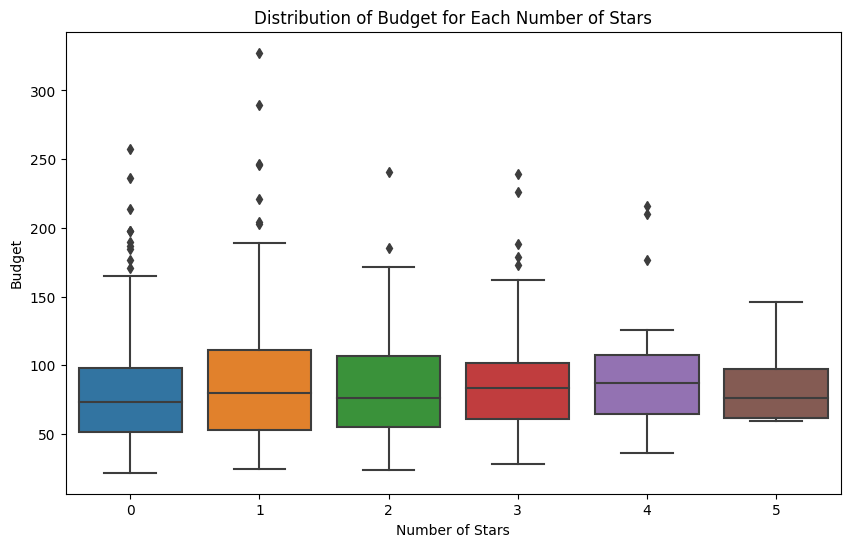

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Stars'], y=df['Budget'])
plt.title('Distribution of Budget for Each Number of Stars')
plt.xlabel('Number of Stars')
plt.ylabel('Budget')
plt.show()

Create a graph showing the average movie budget over time.

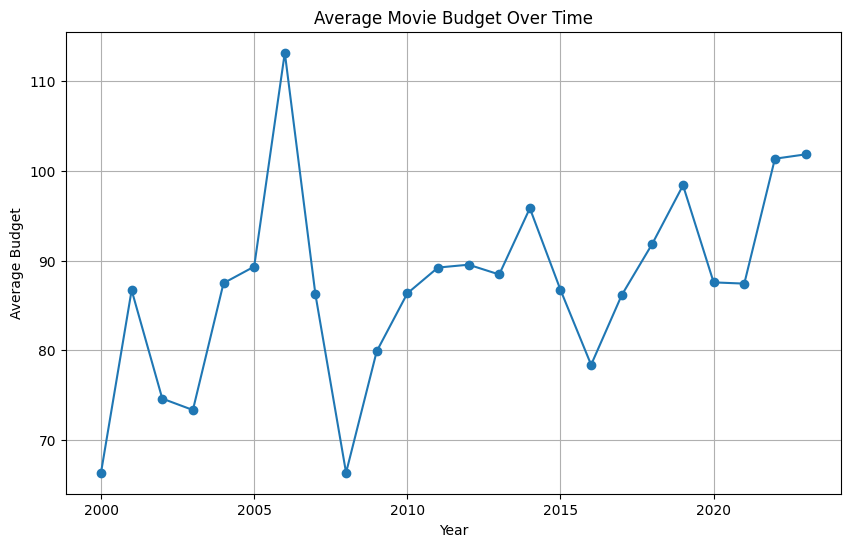

In [ ]:
import matplotlib.pyplot as plt

avg_yearly_budget = df.groupby('Year')['Budget'].mean()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(avg_yearly_budget.index, avg_yearly_budget.values, marker='o', linestyle='-')
plt.title('Average Movie Budget Over Time')
plt.xlabel('Year')
plt.ylabel('Average Budget')
plt.grid(True)
plt.show()

# Feature Engineering

List any features you choose to create (if you are creating many features based on one column, you do not need to list them separately.) You are not required to create any features if you do not wish to. You may create any number of additional features.

1. R1_Value
2. R2_Value
3. R3_Value

The reviews are each a short sentence, but they are being compared and used for analysis as positive and negative. So I added a column each reviewer (R1_Value, R2_Value, R3_Value) with a value representing its sentiment analysis using VADER. This way, I could still access the original review for further analysis but also gained the ability to use this non-numerical data.

4. Genre_Value
5. Season_Value
6. Rating_Value

These allowed me to use the categorical variables of Genre, Season, and Rating as features in my model.

In [ ]:
mapping = {"Romantic Comedy": 1, "Action": 2, "Fantasy": 3, "Drama": 4, "Science fiction": 5}
df['Genre_Value'] = df['Genre'].map(mapping)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   540 non-null    int64  
 1   Title        540 non-null    object 
 2   Runtime      540 non-null    int64  
 3   Stars        540 non-null    int64  
 4   Year         540 non-null    int64  
 5   Budget       540 non-null    float64
 6   Promo        540 non-null    float64
 7   Season       540 non-null    object 
 8   Rating       540 non-null    object 
 9   Genre        540 non-null    object 
 10  R1           540 non-null    object 
 11  R2           540 non-null    object 
 12  R3           540 non-null    object 
 13  Success      540 non-null    bool   
 14  R1_Value     540 non-null    float64
 15  R2_Value     540 non-null    float64
 16  R3_Value     540 non-null    float64
 17  Genre_Value  540 non-null    int64  
dtypes: bool(1), float64(5), int64(5), object(7)
memory

In [ ]:
mapping = {"Spring": 1, "Fall": 2, "Winter": 3, "Summer": 4}
df['Season_Value'] = df['Season'].map(mapping)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    540 non-null    int64  
 1   Title         540 non-null    object 
 2   Runtime       540 non-null    int64  
 3   Stars         540 non-null    int64  
 4   Year          540 non-null    int64  
 5   Budget        540 non-null    float64
 6   Promo         540 non-null    float64
 7   Season        540 non-null    object 
 8   Rating        540 non-null    object 
 9   Genre         540 non-null    object 
 10  R1            540 non-null    object 
 11  R2            540 non-null    object 
 12  R3            540 non-null    object 
 13  Success       540 non-null    bool   
 14  R1_Value      540 non-null    float64
 15  R2_Value      540 non-null    float64
 16  R3_Value      540 non-null    float64
 17  Genre_Value   540 non-null    int64  
 18  Season_Value  540 non-null    

In [ ]:
mapping = {"G": 1, "PG": 2, "PG13": 3, "R": 4}
df['Rating_Value'] = df['Rating'].map(mapping)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    540 non-null    int64  
 1   Title         540 non-null    object 
 2   Runtime       540 non-null    int64  
 3   Stars         540 non-null    int64  
 4   Year          540 non-null    int64  
 5   Budget        540 non-null    float64
 6   Promo         540 non-null    float64
 7   Season        540 non-null    object 
 8   Rating        540 non-null    object 
 9   Genre         540 non-null    object 
 10  R1            540 non-null    object 
 11  R2            540 non-null    object 
 12  R3            540 non-null    object 
 13  Success       540 non-null    bool   
 14  R1_Value      540 non-null    float64
 15  R2_Value      540 non-null    float64
 16  R3_Value      540 non-null    float64
 17  Genre_Value   540 non-null    int64  
 18  Season_Value  540 non-null    

# Modeling

Create a model of your choice.

**Model type choosen:** Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features = ['Budget', 'Promo', 'Stars', 'R1_Value', 'R2_Value', 'R3_Value', 'Genre_Value', 'Year', 'Runtime']
X = df[features]
y = df['Success'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=42, shuffle=True)

random_forest_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

# Testing

Shuffle your data and break it into a 10% test set and 90% training set. Show your model's accuracy on the test set. In order to get full credit, the model's accuracy must be higher than 50%.

**Model accuracy:** 85.19%

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8518518518518519


Show the confusion matrix for your model. To get full credit, your false positive rate and false negative rate must be under 30%.


**False negative rate:** 14.81%

**False positive rate:** 0%

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(cm)
print(f"False Negative: {fn}")
print(f"False Negative Rate: {fn/(fn+tp+tn+fp)}")
print(f"False Positive: {fp}")
print(f"False Positive Rate: {fp/(tn+fp+fn+tp)}")

[[42  0]
 [ 8  4]]
False Negative: 8
False Negative Rate: 0.6666666666666666
False Positive: 0
False Positive Rate: 0.0


What was the most important feature for your model? Don't guess, either look up how to check or do your own tests.

**Most important feature:** Review #1

[0.12049802 0.11446645 0.11201478 0.20646766 0.09337807 0.08308954
 0.07207595 0.08966177 0.10834776]


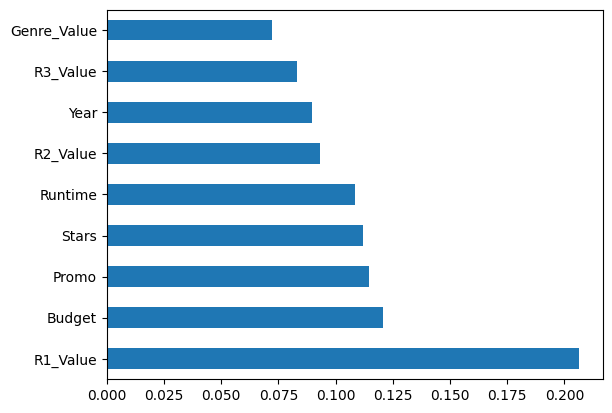

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

X = df[features]
y = df['Success']
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()